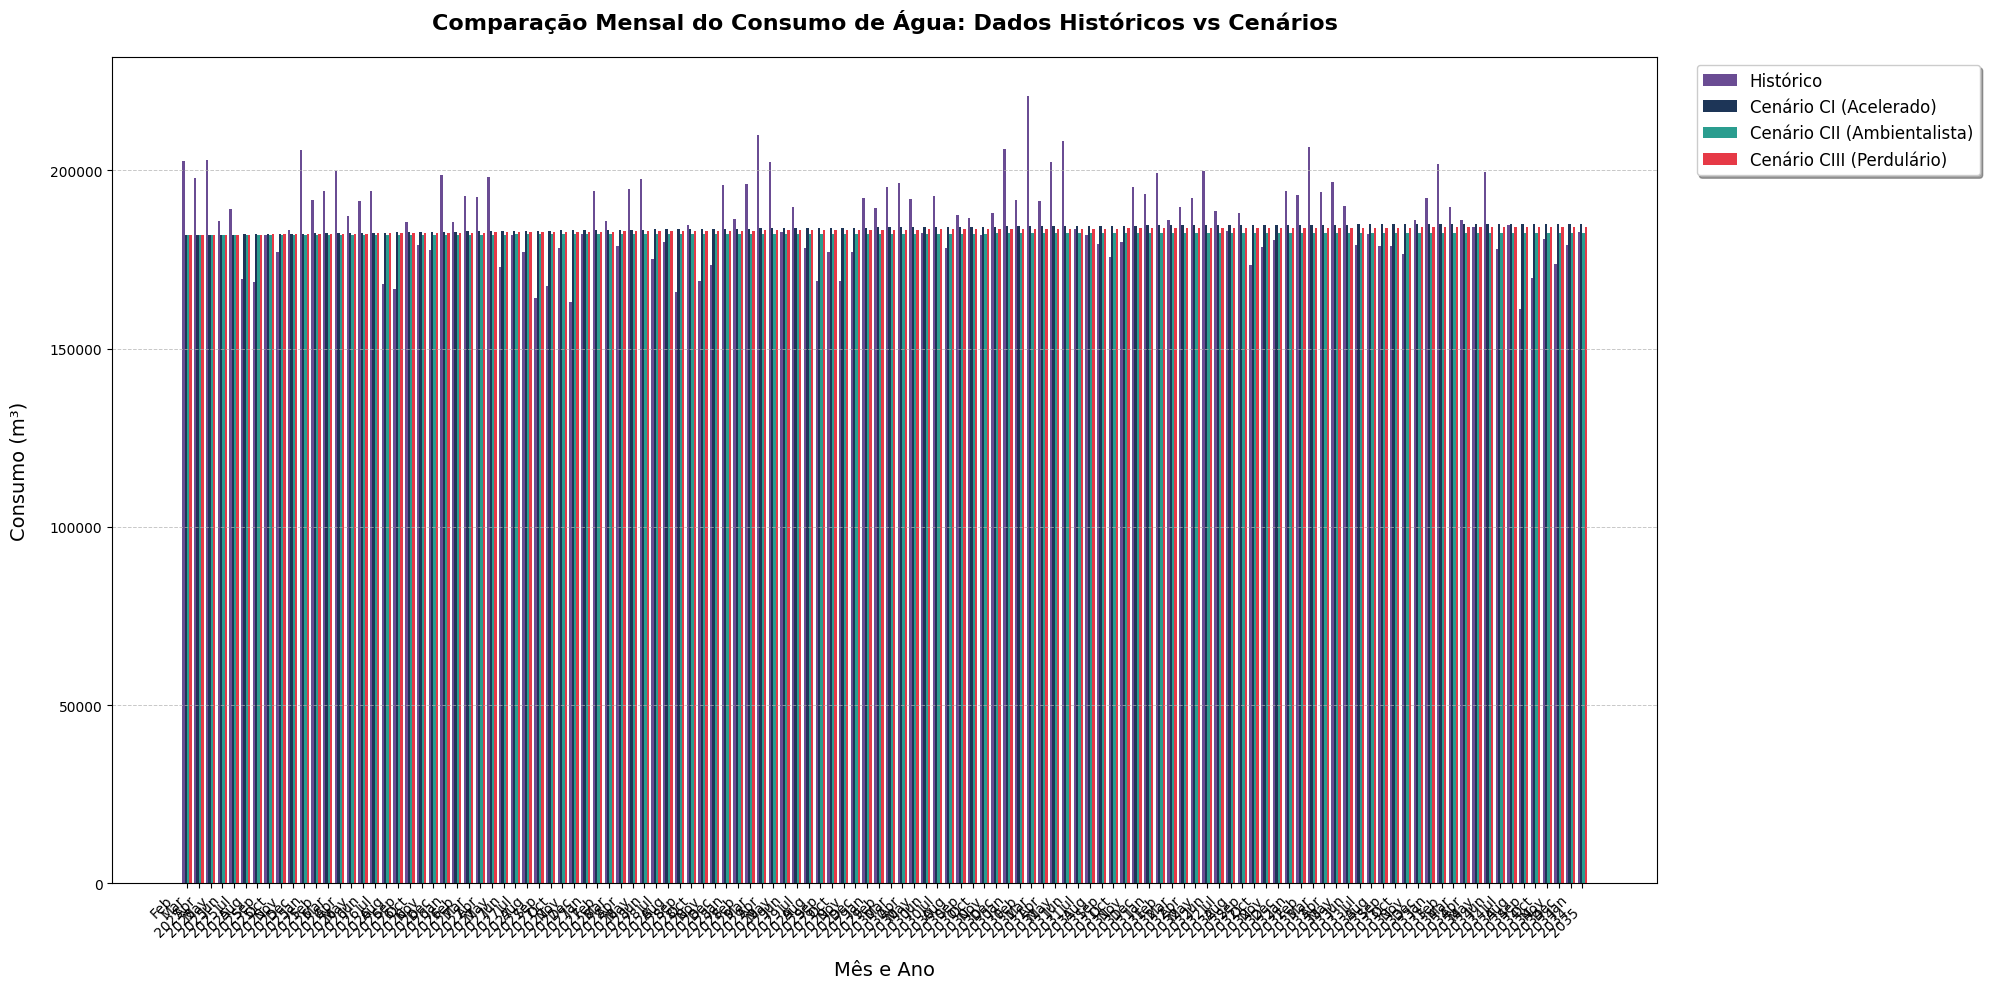

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'

# 1. Carregar dados dos cenários
scenario_file = os.path.join(path, 'resultados\\dados_simulacao3.csv')
df_scenarios = pd.read_csv(scenario_file)
df_scenarios.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']
df_scenarios['Date'] = pd.to_datetime(df_scenarios['Month/Year'], format='%m/%Y')

# 2. Carregar dados históricos com o formato conhecido
historical_file = os.path.join(path, 'includes\\Tabela_consumo_Itapua_120m_por_mes.csv')
df_historical = pd.read_csv(historical_file, sep=';')

# 3. Processar dados históricos
df_historical['Date'] = pd.to_datetime(df_historical['data'])  # Usando a coluna de data já formatada
df_historical.rename(columns={'consumo': 'Historical Consumption'}, inplace=True)

# 4. Selecionar apenas as colunas necessárias
df_historical = df_historical[['Date', 'Historical Consumption']]

# 5. Combinar os dados históricos com os cenários
# Pegamos o mesmo número de meses para comparação justa
min_length = min(len(df_historical), len(df_scenarios))
df_historical = df_historical.tail(min_length).reset_index(drop=True)
df_scenarios = df_scenarios.tail(min_length).reset_index(drop=True)

df_combined = pd.DataFrame({
    'Date': df_scenarios['Date'],
    'Historical': df_historical['Historical Consumption'],
    'Scenario CI': df_scenarios['Scenario CI'],
    'Scenario CII': df_scenarios['Scenario CII'],
    'Scenario CIII': df_scenarios['Scenario CIII']
})

# 6. Configurar o gráfico de barras
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Cores para cada série
colors = {
    'Historical': '#6A4C93',
    'Scenario CI': '#1D3557',
    'Scenario CII': '#2A9D8F',
    'Scenario CIII': '#E63946'
}

# Largura e posição das barras
bar_width = 0.2
positions = np.arange(len(df_combined))

# Plotar cada série de dados
bars_hist = ax.bar(positions - bar_width*1.5, df_combined['Historical'], 
                  width=bar_width, color=colors['Historical'], label='Histórico')
bars_ci = ax.bar(positions - bar_width/2, df_combined['Scenario CI'], 
                width=bar_width, color=colors['Scenario CI'], label='Cenário CI (Acelerado)')
bars_cii = ax.bar(positions + bar_width/2, df_combined['Scenario CII'], 
                 width=bar_width, color=colors['Scenario CII'], label='Cenário CII (Ambientalista)')
bars_ciii = ax.bar(positions + bar_width*1.5, df_combined['Scenario CIII'], 
                  width=bar_width, color=colors['Scenario CIII'], label='Cenário CIII (Perdulário)')

# 7. Configurações do eixo X
ax.set_xticks(positions)
ax.set_xticklabels([date.strftime('%b\n%Y') for date in df_combined['Date']], rotation=45, ha='right')

# 8. Adicionar elementos gráficos
plt.title('Comparação Mensal do Consumo de Água: Dados Históricos vs Cenários', 
         fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Mês e Ano', fontsize=14, labelpad=15)
plt.ylabel('Consumo (m³)', fontsize=14, labelpad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7, axis='y')

# 9. Melhorar a legenda
plt.legend(fontsize=12, framealpha=1, shadow=True, bbox_to_anchor=(1.02, 1), loc='upper left')

# 10. Ajustar layout e mostrar
plt.tight_layout()
plt.show()